In [6]:
import pandas as pd

url = "postgresql://localhost/test?user=postgres&password=248655"


def batch_load_sql(query: str) -> pd.DataFrame:
    CHUNKSIZE = 200000

    chunks = []
    for chunk_dataframe in pd.read_sql(query, url, chunksize=CHUNKSIZE):
        chunks.append(chunk_dataframe)
    return pd.concat(chunks, ignore_index=True)


data = batch_load_sql("""
SELECT co.visitor_token_id,  
	ctt.id AS ticket_type_id
FROM core_order co
JOIN core_orderitem coi ON coi.order_id = co.id
JOIN core_ticket ct ON ct.id=coi.ticket_id
JOIN core_tickettype ctt ON ctt.id=ct.ticket_type_id
WHERE co.visitor_token_id != '' 
    AND ctt.is_event=TRUE 
    AND co.shop_id=4 
    AND co.status=3""")
data

,visitor_token_id,ticket_type_id
0,92b098e46107fc8d3cf69729495c4e6f4ca81884,676
1,92b098e46107fc8d3cf69729495c4e6f4ca81884,680
2,8abd8b51155f47705d046f1941b80ae48a81a7b0,655
3,8abd8b51155f47705d046f1941b80ae48a81a7b0,650
4,7a949a08141e70806871806193d0bd1905750bbf,711
...,...,...
42938,6804240a62741618cf123165dd098165708e6e90,918
42939,dda9e946f0c5920e0be92022c98cca64a6a82e9d,1009
42940,75bd4fbd725ea2ac7b99b3b0835f6b7544067628,949
42941,75bd4fbd725ea2ac7b99b3b0835f6b7544067628,1017


In [7]:
data['visitor_token_id'].nunique()

6142

In [8]:
events = pd.read_csv('Data/events.csv')
users = pd.read_csv('Data/users.csv')

In [9]:
events_tfidf = pd.read_csv('Data/events_tfidf.csv').set_index('ticket_type_id')
users_tfidf = pd.read_csv('Data/users_tfidf.csv').set_index('visitor_token_id')

events_tfidf.shape, users_tfidf.shape

((1035, 17), (38649, 10))

In [10]:
events_bert = pd.read_csv('Data/events_bert.csv').set_index('ticket_type_id')
users_bert = pd.read_csv('Data/users_bert.csv').set_index('visitor_token_id')

events_bert.shape, users_bert.shape

((1035, 27), (38649, 20))

In [107]:
import numpy as np

tfidf_data = (
    data
    .join(events_tfidf, how="inner", on="ticket_type_id")
    .join(users_tfidf, how="inner", on="visitor_token_id")
    .set_index('visitor_token_id')
)
tfidf_data['target'] = np.ones(tfidf_data.shape[0])
tfidf_data = tfidf_data.drop_duplicates()
tfidf_data.head()

,ticket_type_id,name_d2c1,name_d2c2,name_d2c3,name_d2c4,name_d2c5,desc_d2c1,desc_d2c2,desc_d2c3,desc_d2c4,...,job_d2c2,job_d2c3,job_d2c4,job_d2c5,par_d2c1,par_d2c2,par_d2c3,par_d2c4,par_d2c5,target
visitor_token_id,,,,,,,,,,,,,,,,,,,,,
92b098e46107fc8d3cf69729495c4e6f4ca81884,676,-0.272027,-1.099971,-0.076674,-0.205165,-0.085145,-0.088913,0.055067,0.125552,0.118178,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,680,0.423905,-2.208672,0.250475,0.153780,0.324898,-0.062624,0.067602,0.110351,0.109241,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
8abd8b51155f47705d046f1941b80ae48a81a7b0,655,-0.316121,-0.224960,-0.253385,-0.424749,-0.301081,1.644107,1.805641,0.963414,1.165646,...,-0.299506,-0.413816,-0.414564,-0.551328,0.329032,0.605025,1.057802,0.493619,0.586823,1.0
8abd8b51155f47705d046f1941b80ae48a81a7b0,650,1.448713,1.383291,1.075722,1.007770,1.377227,-0.740161,-0.354904,-0.000782,-0.099299,...,-0.299506,-0.413816,-0.414564,-0.551328,0.329032,0.605025,1.057802,0.493619,0.586823,1.0
7a949a08141e70806871806193d0bd1905750bbf,711,1.399947,1.254318,0.985009,1.343269,1.372194,-0.014142,-0.058902,0.071609,0.060476,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0


In [108]:
bert_data = (
    data
    .join(events_bert, how="inner", on="ticket_type_id")
    .join(users_bert, how="inner", on="visitor_token_id")
    .set_index('visitor_token_id')
)
bert_data['target'] = np.ones(bert_data.shape[0])
bert_data = bert_data.drop_duplicates()
bert_data.head()

,ticket_type_id,name_v1,name_v2,name_v3,name_v4,name_v5,name_v6,name_v7,name_v8,name_v9,...,par_2,par_3,par_4,par_5,par_6,par_7,par_8,par_9,par_10,target
visitor_token_id,,,,,,,,,,,,,,,,,,,,,
92b098e46107fc8d3cf69729495c4e6f4ca81884,676,0.854508,-1.813339,-1.323104,1.288368,-2.006350,1.686266,0.570243,-0.533082,-1.591500,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,680,-1.327338,-0.808679,-0.571024,2.531991,0.093984,-0.040643,1.244932,-0.681953,0.234717,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
8abd8b51155f47705d046f1941b80ae48a81a7b0,655,0.568861,-2.990423,-1.058524,-0.189613,-0.530128,-4.324193,-0.670284,-0.277806,-0.585972,...,-0.260351,-1.668852,-3.246215,-0.176565,-1.883723,0.003376,0.932283,-1.286045,-0.842716,1.0
8abd8b51155f47705d046f1941b80ae48a81a7b0,650,-0.163601,0.199824,-1.185066,0.141109,-0.541322,-2.278492,-0.477662,1.225082,-0.509199,...,-0.260351,-1.668852,-3.246215,-0.176565,-1.883723,0.003376,0.932283,-1.286045,-0.842716,1.0
7a949a08141e70806871806193d0bd1905750bbf,711,-1.704049,2.654762,1.763201,-0.613931,-0.376059,2.258680,-0.417837,1.858507,-0.350853,...,-4.955370,3.977472,-2.756238,-1.495362,2.221772,-0.180243,-0.859990,0.827402,1.801755,1.0


In [109]:
from tqdm import tqdm
from datetime import datetime

n = 30

for token in tqdm(set(tfidf_data.index)):
    tfidf_sample = (tfidf_data[(tfidf_data.index != token) &
                               (tfidf_data.time_year != datetime.now().year)]
                    .sample(n=n)
                    .reset_index(drop=True))

    user = users_tfidf[users_tfidf.index == token].reset_index(drop=True)

    tfidf_sample[user.columns] = user.to_numpy().repeat(n, axis=0)
    tfidf_sample.index = [token for _ in range(n)]
    tfidf_sample['target'] = 0

    tfidf_data = pd.concat([tfidf_data, tfidf_sample], axis=0)

model_tfidf_data = tfidf_data.drop_duplicates()
model_tfidf_data.to_csv('Data/model_tfidf.csv')

print(model_tfidf_data['target'].value_counts())
model_tfidf_data.head()

100%|██████████| 2621/2621 [00:58<00:00, 44.66it/s]


target
0.0    61569
1.0    15895
Name: count, dtype: int64


,ticket_type_id,name_d2c1,name_d2c2,name_d2c3,name_d2c4,name_d2c5,desc_d2c1,desc_d2c2,desc_d2c3,desc_d2c4,...,job_d2c2,job_d2c3,job_d2c4,job_d2c5,par_d2c1,par_d2c2,par_d2c3,par_d2c4,par_d2c5,target
92b098e46107fc8d3cf69729495c4e6f4ca81884,676,-0.272027,-1.099971,-0.076674,-0.205165,-0.085145,-0.088913,0.055067,0.125552,0.118178,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,680,0.423905,-2.208672,0.250475,0.153780,0.324898,-0.062624,0.067602,0.110351,0.109241,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
8abd8b51155f47705d046f1941b80ae48a81a7b0,655,-0.316121,-0.224960,-0.253385,-0.424749,-0.301081,1.644107,1.805641,0.963414,1.165646,...,-0.299506,-0.413816,-0.414564,-0.551328,0.329032,0.605025,1.057802,0.493619,0.586823,1.0
8abd8b51155f47705d046f1941b80ae48a81a7b0,650,1.448713,1.383291,1.075722,1.007770,1.377227,-0.740161,-0.354904,-0.000782,-0.099299,...,-0.299506,-0.413816,-0.414564,-0.551328,0.329032,0.605025,1.057802,0.493619,0.586823,1.0
7a949a08141e70806871806193d0bd1905750bbf,711,1.399947,1.254318,0.985009,1.343269,1.372194,-0.014142,-0.058902,0.071609,0.060476,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0


In [110]:
for token in tqdm(set(bert_data.index)):
    bert_sample = (bert_data[(bert_data.index != token) &
                             (bert_data.time_year != datetime.now().year)]
                   .sample(n=n)
                   .reset_index(drop=True))

    user = users_bert[users_bert.index == token].reset_index(drop=True)

    bert_sample[user.columns] = user.to_numpy().repeat(n, axis=0)
    bert_sample.index = [token for _ in range(n)]
    bert_sample['target'] = 0

    bert_data = pd.concat([bert_data, bert_sample], axis=0)

model_bert_data = bert_data.drop_duplicates()
model_bert_data.to_csv('Data/model_bert.csv')

print(model_bert_data['target'].value_counts())
model_bert_data.head()

100%|██████████| 3082/3082 [02:02<00:00, 25.25it/s]


target
0.0    85471
1.0    19570
Name: count, dtype: int64


,ticket_type_id,name_v1,name_v2,name_v3,name_v4,name_v5,name_v6,name_v7,name_v8,name_v9,...,par_2,par_3,par_4,par_5,par_6,par_7,par_8,par_9,par_10,target
92b098e46107fc8d3cf69729495c4e6f4ca81884,676,0.854508,-1.813339,-1.323104,1.288368,-2.006350,1.686266,0.570243,-0.533082,-1.591500,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,680,-1.327338,-0.808679,-0.571024,2.531991,0.093984,-0.040643,1.244932,-0.681953,0.234717,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
8abd8b51155f47705d046f1941b80ae48a81a7b0,655,0.568861,-2.990423,-1.058524,-0.189613,-0.530128,-4.324193,-0.670284,-0.277806,-0.585972,...,-0.260351,-1.668852,-3.246215,-0.176565,-1.883723,0.003376,0.932283,-1.286045,-0.842716,1.0
8abd8b51155f47705d046f1941b80ae48a81a7b0,650,-0.163601,0.199824,-1.185066,0.141109,-0.541322,-2.278492,-0.477662,1.225082,-0.509199,...,-0.260351,-1.668852,-3.246215,-0.176565,-1.883723,0.003376,0.932283,-1.286045,-0.842716,1.0
7a949a08141e70806871806193d0bd1905750bbf,711,-1.704049,2.654762,1.763201,-0.613931,-0.376059,2.258680,-0.417837,1.858507,-0.350853,...,-4.955370,3.977472,-2.756238,-1.495362,2.221772,-0.180243,-0.859990,0.827402,1.801755,1.0


In [111]:
from catboost import CatBoostClassifier

X_tfidf = (model_tfidf_data
           .drop(columns=['target', 'ticket_type_id', 'time_year', 'time_day', 'scl_price', 'type']))
y_tfidf = model_tfidf_data['target']

tfidf_feature_weights = [3 if 'ohe' in elem else 1 for elem in X_tfidf.columns.values]

tfidf_model = CatBoostClassifier(feature_weights=None)

tfidf_model.fit(X_tfidf, y_tfidf)
# tfidf_model.save_model('Models/tfidf_catboost_v1', format="cbm")

Learning rate set to 0.066005
0:	learn: 0.6652898	total: 16.1ms	remaining: 16.1s
1:	learn: 0.6394169	total: 29.2ms	remaining: 14.6s
2:	learn: 0.6168411	total: 42ms	remaining: 13.9s
3:	learn: 0.5992842	total: 53.9ms	remaining: 13.4s
4:	learn: 0.5823668	total: 65.4ms	remaining: 13s
5:	learn: 0.5648770	total: 77.1ms	remaining: 12.8s
6:	learn: 0.5529871	total: 88.6ms	remaining: 12.6s
7:	learn: 0.5426362	total: 99.4ms	remaining: 12.3s
8:	learn: 0.5321774	total: 111ms	remaining: 12.2s
9:	learn: 0.5243395	total: 122ms	remaining: 12.1s
10:	learn: 0.5169274	total: 133ms	remaining: 12s
11:	learn: 0.5103253	total: 145ms	remaining: 12s
12:	learn: 0.5045534	total: 156ms	remaining: 11.9s
13:	learn: 0.4984604	total: 168ms	remaining: 11.8s
14:	learn: 0.4931991	total: 179ms	remaining: 11.8s
15:	learn: 0.4877644	total: 190ms	remaining: 11.7s
16:	learn: 0.4833582	total: 201ms	remaining: 11.6s
17:	learn: 0.4790923	total: 212ms	remaining: 11.6s
18:	learn: 0.4752015	total: 223ms	remaining: 11.5s
19:	learn: 

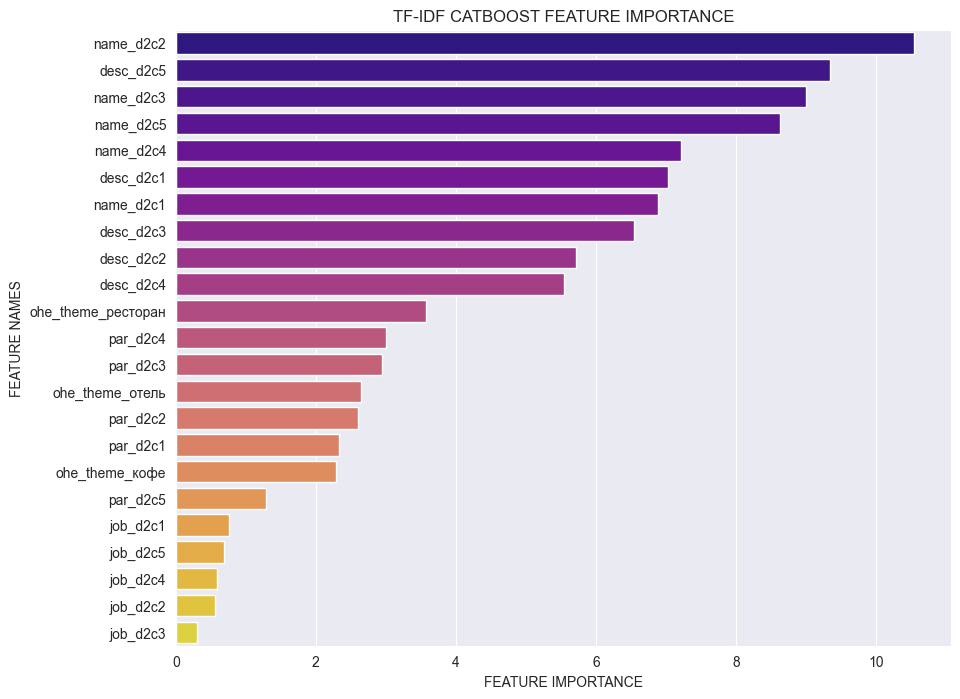

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))

    palette = sns.color_palette('plasma', len(fi_df))
    sns.barplot(x=fi_df['feature_importance'],
                y=fi_df['feature_names'],
                palette=palette,
                hue=fi_df['feature_names'],
                legend=False)

    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(tfidf_model.feature_importances_, X_tfidf.columns, 'TF-IDF CATBOOST')

In [113]:
X_bert = (model_bert_data
          .drop(columns=['target', 'ticket_type_id', 'time_year', 'time_day', 'scl_price', 'type']))
y_bert = model_bert_data['target']

bert_feature_weights = [3 if 'ohe' in elem else 1 for elem in X_bert.columns.values]

bert_model = CatBoostClassifier(feature_weights=None)

bert_model.fit(X_bert, y_bert)
# bert_model.save_model('Models/bert_catboost_v1', format="cbm")

Learning rate set to 0.075172
0:	learn: 0.6543388	total: 37.8ms	remaining: 37.8s
1:	learn: 0.6213045	total: 56.3ms	remaining: 28.1s
2:	learn: 0.5963461	total: 71.2ms	remaining: 23.7s
3:	learn: 0.5707673	total: 86ms	remaining: 21.4s
4:	learn: 0.5506936	total: 101ms	remaining: 20.1s
5:	learn: 0.5349615	total: 116ms	remaining: 19.3s
6:	learn: 0.5167187	total: 133ms	remaining: 18.8s
7:	learn: 0.5038794	total: 147ms	remaining: 18.2s
8:	learn: 0.4942250	total: 161ms	remaining: 17.7s
9:	learn: 0.4832977	total: 176ms	remaining: 17.4s
10:	learn: 0.4749956	total: 192ms	remaining: 17.3s
11:	learn: 0.4670533	total: 208ms	remaining: 17.1s
12:	learn: 0.4597027	total: 223ms	remaining: 16.9s
13:	learn: 0.4520993	total: 239ms	remaining: 16.8s
14:	learn: 0.4439549	total: 255ms	remaining: 16.8s
15:	learn: 0.4394320	total: 271ms	remaining: 16.6s
16:	learn: 0.4353518	total: 288ms	remaining: 16.7s
17:	learn: 0.4298471	total: 312ms	remaining: 17s
18:	learn: 0.4246760	total: 327ms	remaining: 16.9s
19:	learn: 

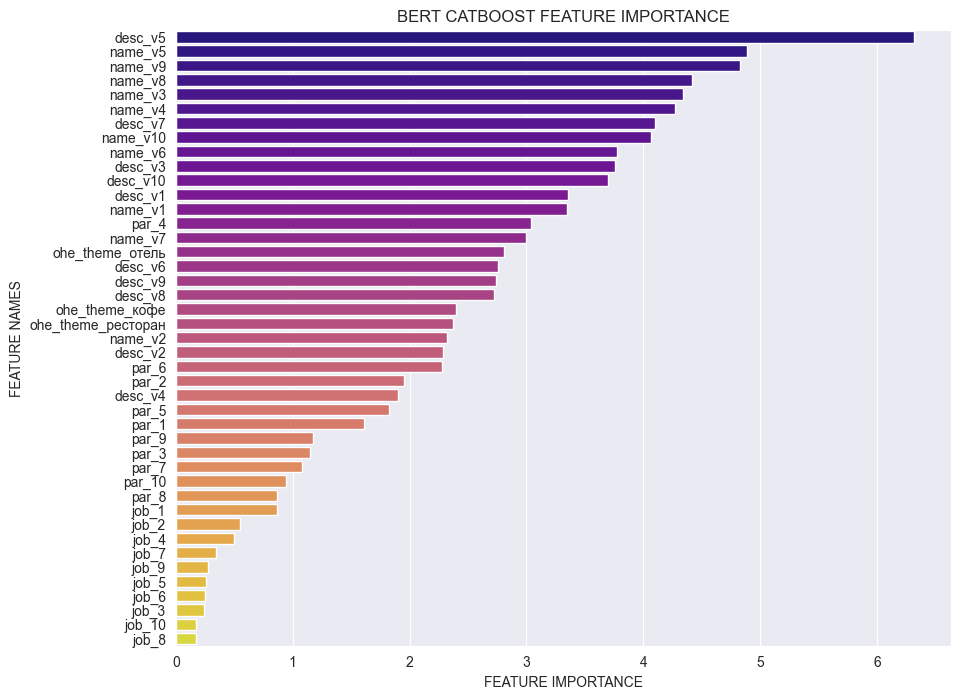

In [114]:
plot_feature_importance(bert_model.feature_importances_, X_bert.columns, 'BERT CATBOOST')

In [115]:
def get_predictions(token: str):
    current_year = datetime.now().year
    tmp_tfidf = (model_tfidf_data[(model_tfidf_data.index != token) &
                                  (model_tfidf_data['time_year'] == current_year)]
                 .drop(columns=['target', 'time_year', 'type'])
                 .drop_duplicates(subset=['ticket_type_id'])
                 .reset_index(drop=True))

    tmp_bert = (model_bert_data[(model_bert_data.index != token) &
                                (model_bert_data['time_year'] == current_year)]
                .drop(columns=['target', 'time_year', 'type'])
                .drop_duplicates(subset=['ticket_type_id'])
                .reset_index(drop=True))

    tfidf_tt_ids = tmp_tfidf['ticket_type_id']
    tfidf_bert_ids = tmp_bert['ticket_type_id']

    tmp_tfidf = tmp_tfidf.drop(columns=['ticket_type_id'])
    tmp_bert = tmp_bert.drop(columns=['ticket_type_id'])

    tfidf_user = users_tfidf[users_tfidf.index == token]
    bert_user = users_bert[users_bert.index == token]

    tmp_tfidf[tfidf_user.columns] = tfidf_user.to_numpy().repeat(len(tmp_tfidf), axis=0)
    tmp_bert[bert_user.columns] = bert_user.to_numpy().repeat(len(tmp_bert), axis=0)

    tfidf_result = tfidf_model.predict_proba(tmp_tfidf)
    bert_result = bert_model.predict_proba(tmp_bert)

    top_5_tfidf = (tfidf_tt_ids[np.argsort(tfidf_result[:, 1])[-5:]]
                   .rename('tfidf_res')
                   .reset_index(drop=True))

    top_5_bert = (tfidf_bert_ids[np.argsort(bert_result[:, 1])[-5:]]
                  .rename('bert_res')
                  .reset_index(drop=True))

    return pd.concat([top_5_tfidf, top_5_bert], axis=1)


get_predictions(token='0047b464ea7149de1269403c6034da6a08f94e10')

,tfidf_res,bert_res
0,950,1179
1,966,1100
2,1058,1095
3,1035,1050
4,1096,1168


In [116]:
users

,visitor_token_id,job,params
0,0000b08340cc86c7a61cc3251fbf2544c6472dda,бариста наставник,NaN
1,0004214be6142004e5dfae0c869f7648c33e3640,менеджер по работе с ключевыми клиентами,NaN
2,00099e4722876bce6828a4d083f59d9bc80284d1,NaN,ресторан кафе продукты питания и напитки
3,000aa3c29eee38748aa67148ec80f8754f27017f,NaN,кулинарная студия
4,000cf2d412eb10cae69abe61b606e8be3063d9ba,NaN,ресторан кафе ресторан кафе
...,...,...,...
38644,fff47c137b2ba6a66e4670fe3701f3088682b86e,су шеф кондитер,городской отель изучение рынка знакомство с но...
38645,fff5ecf120366e7a9982e7e01666f84280478336,NaN,NaN
38646,fff6302be5388f9160e86cb11a6be2cf487a1c5b,founder,кофейня общение с коллегами установление новых...
38647,fff676d8522543716287e474ed6eebe50db360ab,генеральный директор,изучение рынка знакомство с новинками получени...


In [119]:
tfidf_predictions = get_predictions(token='ffc9f60dfbf0ed357d14494de1228f011d5f199c').iloc[:, 0]
events[events['ticket_type_id'].isin(tfidf_predictions)].set_index('ticket_type_id')

,name,description,time_start,price,type_name,theme
ticket_type_id,,,,,,
950,управление экономикой ресторана на постоянной ...,в ресторанной сфере постоянно усиливается конк...,2024-10-22 11:30:00+00:00,3500.0,семинар,ресторан
1054,успешная команда успешный бар,как создать классную команду и удерживать свои...,2024-10-22 07:30:00+00:00,2500.0,семинар,ресторан
1109,hr бренд chicko почему в компании не бывает пр...,близкая к текучесть кадров миф или реальность ...,2024-10-23 08:45:00+00:00,0.0,дискуссия,ресторан
1110,управление вознаграждениями как развивать вдох...,погружение в потребности чего хотят ценные сот...,2024-10-23 10:00:00+00:00,0.0,дискуссия,ресторан
1119,путь от маленького ресторана производства до к...,на мероприятии обсудим подходы в выстраивании ...,2024-10-22 14:00:00+00:00,3500.0,семинар,ресторан


In [120]:
bert_predictions = get_predictions(token='ffc9f60dfbf0ed357d14494de1228f011d5f199c').iloc[:, 1]
events[events['ticket_type_id'].isin(bert_predictions)].set_index('ticket_type_id')

,name,description,time_start,price,type_name,theme
ticket_type_id,,,,,,
971,роль операционного директора в улучшении прибы...,суть функционала операционного директора в рес...,2024-10-21 09:20:00+00:00,3500.0,семинар,ресторан
1050,операционная эффективность и увеличение дохода...,на примере кейсов и цифр эксперт продемонстрир...,2024-10-22 12:00:00+00:00,2500.0,семинар,ресторан
905,прокачиваем программу лояльности до,мероприятие посвященное эффективному управлени...,2024-10-23 11:00:00+00:00,3500.0,лекция,ресторан
1109,hr бренд chicko почему в компании не бывает пр...,близкая к текучесть кадров миф или реальность ...,2024-10-23 08:45:00+00:00,0.0,дискуссия,ресторан
1168,модульный отель без архитектуры и концепции пу...,что нужно учитывать при реализации проекта в с...,2024-10-21 11:20:00+00:00,0.0,семинар,отель


In [ ]:
# Пицца, Алкоголь, Кофе, Ресторан, Кондитерка, Отель